In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [15]:
#
lp_pool_ppo_5m = pd.read_csv('../../runs/cass0221/train/yeslp666/merge-csv.com__60331d68477cf.csv', header = 2)

In [16]:
lp_pool_ppo_5m.sort_values(by='step', inplace=True)

lp_pool_ppo_5m

,wall_time,step,lp/jensenShannon,lp/value_from_net,run/total_games,run/total_wins,run/total_reward,run/length,lp/lp_total_reward,lp/lp_length,...,lp/total_wins,lp/unique_lp_states,loss/value_loss,loss/policy_loss,loss/agent_loss,total_loss,lp_loss/value_loss,lp_loss/policy_loss,lp_loss/agent_loss,total_loss_LP
0,1.613817e+09,0,0.499999,0.511111,1.0,0.0,0.0,300.0,-1.0,-1.0,...,0.0,0.0,0.476409,-0.148222,0.328188,0.328188,0.464469,-0.138719,0.325750,0.325750
2175,1.613428e+09,0,0.499999,0.511111,1.0,0.0,0.0,300.0,-1.0,-1.0,...,0.0,0.0,0.508865,-0.152823,0.356042,0.356042,0.361695,-0.141898,0.219797,0.219797
9093,1.613530e+09,0,0.499999,0.511111,1.0,0.0,0.0,300.0,-1.0,-1.0,...,0.0,0.0,0.406027,-0.157660,0.248368,0.248368,0.452202,-0.133590,0.318612,0.318612
13778,1.613625e+09,0,0.499999,0.511111,1.0,0.0,0.0,300.0,-1.0,-1.0,...,0.0,0.0,0.468335,-0.149276,0.319059,0.319059,0.438999,-0.134963,0.304036,0.304036
4908,1.613722e+09,0,0.499999,0.511111,1.0,0.0,0.0,300.0,-1.0,-1.0,...,0.0,0.0,0.462558,-0.162260,0.300298,0.300298,2.653799,-1.079394,1.574405,1.574405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19433,1.613653e+09,1443937,0.499999,0.511111,5656.0,1971.0,0.0,300.0,-1.0,-1.0,...,567.0,36.0,0.028226,-0.354602,-0.326375,-0.326375,0.091131,-0.541255,-0.450124,-0.450124
19434,1.613653e+09,1444237,0.026817,0.739876,5657.0,1971.0,0.0,300.0,0.0,300.0,...,567.0,36.0,0.040956,-0.412793,-0.371838,-0.371838,0.115212,-0.695372,-0.580160,-0.580160
19435,1.613653e+09,1444537,0.499999,0.511111,5658.0,1971.0,0.0,300.0,-1.0,-1.0,...,567.0,36.0,0.034879,-0.377869,-0.342990,-0.342990,0.107327,-0.758990,-0.651662,-0.651662
19436,1.613653e+09,1444837,0.027889,0.725021,5659.0,1972.0,1.0,153.0,1.0,153.0,...,568.0,36.0,0.023749,-0.397536,-0.373787,-0.373787,0.084178,-0.713997,-0.629818,-0.629818


In [4]:
lp_pool_ppo_5m.sort_values(by='step', inplace=True)

step_sums = dict() 
# {key: (reward_sum, count, length_of_run) }

for index, row, in lp_pool_ppo_5m.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']
        

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length'])


for key, value in step_sums.items():
    
    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]
    
    
    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)
df_av_at_step.set_index('step')


rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span = 1000).var()
rolling

df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']

df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_agrs = df_av_at_step
df_LP = df_agrs

df_agrs


,step,reward,length,reward_se,length_se
0,0.0,0.000000,300.000000,0.000000,0.000000
1,300.0,0.083417,297.580917,0.013889,11.680556
2,571.0,0.055555,298.388891,0.009259,7.787042
3,600.0,0.041625,298.792877,0.006940,5.836384
4,871.0,0.234067,258.272706,0.189447,8172.886306
...,...,...,...,...,...
19861,1443937.0,0.412192,246.193333,0.242497,6779.629719
19862,1444237.0,0.411369,246.300839,0.242352,6771.862757
19863,1444537.0,0.410547,246.408130,0.242206,6764.088244
19864,1444837.0,0.411725,246.221500,0.242415,6767.988892


,step,reward,length,reward_se,length_se
0,0.0,0.000000,100.000000,0.000000,0.000000
1,100.0,0.500500,75.976000,0.500000,1152.000000
2,152.0,0.667333,80.326019,0.333000,632.022048
3,241.0,0.499999,85.259279,0.333334,517.886459
4,341.0,0.600400,76.171180,0.299901,798.936096
...,...,...,...,...,...
372,28812.0,0.527301,74.730818,0.249956,711.201708
373,28879.0,0.529094,74.572511,0.249852,715.098557
374,28912.0,0.530877,74.456742,0.249744,715.921648
375,28956.0,0.532650,74.375636,0.249629,714.949175


In [9]:
# 1 runs of LP3_20_1LP_noDFA
pqr_no_agrs_100_30k = pd.read_csv('../../runs/cass0221/train/nolp_csv/merge-csv.com__6033113be8747.csv', header = 2)

pqr_no_agrs_100_30k.sort_values(by='step', inplace=True)

#PIPELINE FOR AVERAGE OF MOVING AVERAGES

step_sums = dict()
# {key: (reward_sum, count, length_of_run) }

for index, row, in pqr_no_agrs_100_30k.iterrows():
    step = row['step']
    if step in step_sums:
        # adding rewards for the step
        step_sums[step][0] += row['run/total_reward']
        step_sums[step][1] += 1
        step_sums[step][2] += row['run/length']
    else:
        step_sums[step] = [0, 1, row['run/length']]
        step_sums[step][0] += row['run/total_reward']

# take average reward and length at each saved step
df_av_at_step = pd.DataFrame(columns=['step', 'reward', 'length']);df_av_at_step

for key, value in step_sums.items():

    mean_reward = value[0] / value[1]
    mean_length = value[2] / value[1]


    df_av_at_step = df_av_at_step.append({'step': key, 'reward': mean_reward, 'length': mean_length}, ignore_index=True)

df_av_at_step.set_index('step')

rolling = df_av_at_step.ewm(adjust = True, span=1000).mean()
rolling_se = df_av_at_step.ewm(adjust = True, span=1000).var()
df_av_at_step['reward'] = rolling['reward']
df_av_at_step['reward_se'] = rolling_se['reward']
df_av_at_step['length_se'] = rolling_se['length']
df_av_at_step['length'] = rolling['length']


df_av_at_step = df_av_at_step.fillna(0);df_av_at_step
df_noLP = df_av_at_step
df_noLP

,step,reward,length,reward_se,length_se
0,0.0,0.363636,270.909091,0.000000,0.000000
1,121.0,0.181636,285.469091,0.066116,423.140496
2,178.0,0.120970,290.322418,0.044033,281.811476
3,282.0,0.090637,292.749076,0.032992,211.147108
4,299.0,0.072437,294.205068,0.026367,168.748600
...,...,...,...,...,...
206941,5000643.0,0.424404,250.247770,0.243313,5529.809360
206942,5000679.0,0.425554,250.031491,0.243488,5542.149149
206943,5000699.0,0.424704,250.131328,0.243363,5536.059655
206944,5000773.0,0.425854,250.218978,0.243538,5528.839831


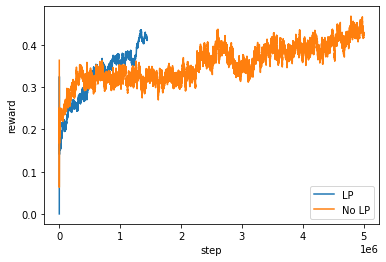

In [10]:
fig, axs = plt.subplots(ncols=1)
sns.lineplot(x="step", y="reward", data=df_LP,ax=axs, ci=99)
sns.lineplot(x="step", y="reward", data=df_noLP,ax=axs, ci=99)
axs.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

#axs.fill_between(x=df_LP["step"], y1=df_LP["reward"] + df_LP["reward_se"],y2=df_LP["reward"] - df_LP["reward_se"], alpha=.5)
axs.legend(['LP','No LP'], loc=4)

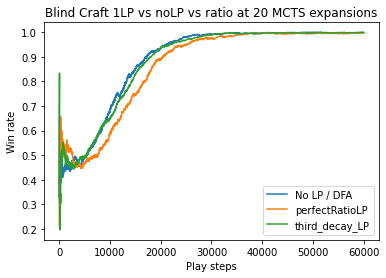

In [14]:
import itertools
marker = itertools.cycle((',', '+', '.', 'o', '*'))


fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')

sns.lineplot(x="step", y="reward", data=df_no_agrs,ax=axs, ci=99, )


sns.lineplot(x="step", y="reward", data=df_perfectratio,ax=axs, ci=99, )
sns.lineplot(x="step", y="reward", data=df_third_decay ,ax=axs, ci=99, )


#axs.fill_between(x=df_agrs["step"], y1=df_agrs["reward"] + df_agrs["reward_se"],
#                 y2=df_agrs["reward"] - df_agrs["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_agrs["step"], y1=df_no_agrs["reward"] + df_no_agrs["reward_se"],
#                 y2=df_no_agrs["reward"] - df_no_agrs["reward_se"], alpha=.5)
#axs.fill_between(x=df_no_lp_no_dfa["step"], y1=df_no_lp_no_dfa["reward"] + df_no_lp_no_dfa["reward_se"],
#                 y2=df_no_lp_no_dfa["reward"] - df_no_lp_no_dfa["reward_se"], alpha=.5)
axs.set(xlabel='Play steps', ylabel='Win rate')
plt.title('Blind Craft 1LP vs noLP vs ratio at 20 MCTS expansions')

axs.legend(['No LP / DFA', 'perfectRatioLP', 'third_decay_LP'])

NameError: name 'df_all_lp_dfa' is not defined

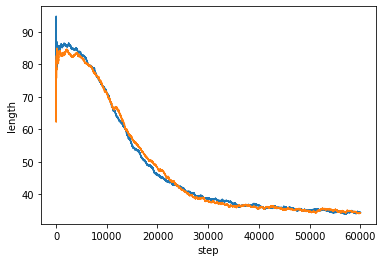

In [15]:
fig, axs = plt.subplots(ncols=1)
#plt.title('Mine Recycler, Fixed 10x10')
sns.lineplot(x="step", y="length", data=df_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_agrs,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_all_lp_dfa,ax=axs, ci=99)

sns.lineplot(x="step", y="length", data=df_1LP_noDFA,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_no_lp_no_dfa,ax=axs, ci=99)
sns.lineplot(x="step", y="length", data=df_all_lp_noDFA,ax=axs, ci=99)

axs.set(xlabel='Play steps', ylabel='Length per Episode')
plt.title('Blind Craft 3threads, 1/3 LP, 25runs * 60k steps at 20 MCTS expansions')

axs.legend(['1LP / DFA', 'No LP / DFA', 'ALL LP / DFA', '1LP / No DFA', 'No LP / No DFA', 'all LP / no DFA'], loc=1)

